# <font color=white>Aula 03 - Regressão Linear Simples</font>
---

<img src="https://selecao-stg.letscode.com.br/favicon.png" style="position: absolute; top: 0.75rem; right: 2rem; width: 50px" />

## Roteiro da Aula

1. Correlação vs Regressão Linear
2. Regressão Linear: Conceitos Iniciais
3. Entendendo a regressão linear na prática
4. Como encontrar a reta de regressão ideal? (Minimizando o erro)
5. Exemplo prático: Peso e Altura  
    - Conhecendo as bibliotecas: `sklearn` e `statsmodels`  
    - Modelo com a presença de outliers  
6. Características do Erro
7. Métricas para Análise dos Erros

> [Slides sobre Regressão Linear](https://docs.google.com/presentation/d/1zs6WbS1VQDykVvi3rduVnlG_NTlH9V3Q/edit?usp=sharing&ouid=100697162582615560133&rtpof=true&sd=true)

---

## 1. Correlação vs Regressão Linear

| Correlação | Regressão |
|:----------:|:---------:|
| Mede o grau de relação entre duas variáveis | Uma variável afeta a outra |
| Grau de interelação | Baseada em causalidade (~Relação~ → Causa e efeito) |
| $\rho(x,y)$ = $\rho(y,x)$ | Unidirecional |
| Único ponto | Linha |

### $\Rightarrow$ Correlação não implica em causalidade!

In [1]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

## 2. Regressão Linear: Conceitos iniciais

In [2]:
x = np.arange(6)

In [3]:
x

array([0, 1, 2, 3, 4, 5])

In [4]:
y = x # função identidade

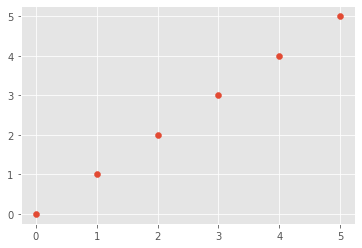

In [5]:
plt.scatter(x, y)

### Equação da reta de regressão

$$
    y = \beta_0 + \beta_1 \cdot x
$$

In [6]:
beta_0 = 0
beta_1 = 1

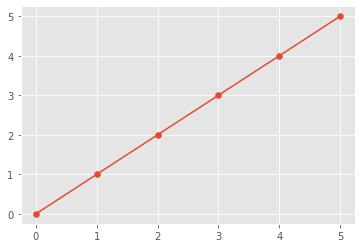

In [7]:
plt.plot(x, y)
plt.scatter(x, y)

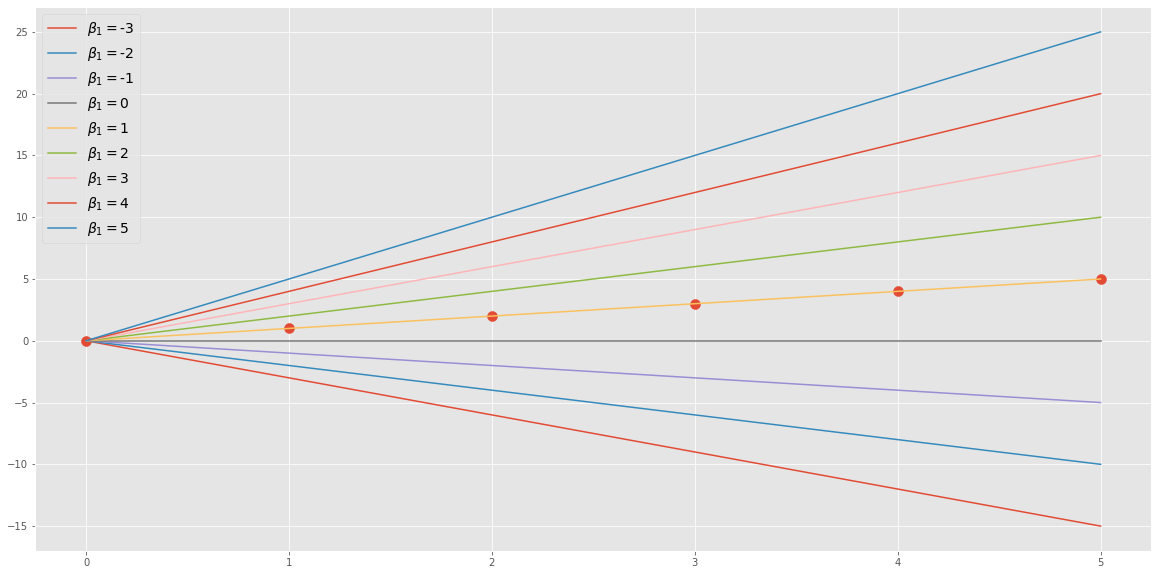

In [8]:
# Coeficiente x EQM
b0 = 0

plt.figure(figsize=(20,10))
plt.scatter(x, y, s=100)

coeficiente_erro = []

for b1 in range(-3, 6):
    y_est = b0 + b1 * x
    plt.plot(x, y_est, label='$\\beta_1 = $' + str(b1))
    
    erro = sum((y_est - y)**2) / 6 # Erro médio quadrático
    
    coeficiente_erro.append([b1, erro])
    
plt.legend(fontsize=14)

In [9]:
coeficiente_erro

[[-3, 146.66666666666666],
 [-2, 82.5],
 [-1, 36.666666666666664],
 [0, 9.166666666666666],
 [1, 0.0],
 [2, 9.166666666666666],
 [3, 36.666666666666664],
 [4, 82.5],
 [5, 146.66666666666666]]

In [10]:
coef_erro = np.array(coeficiente_erro)

In [11]:
coef_erro[:,0]

array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

In [12]:
coef_erro[:,1]

array([146.66666667,  82.5       ,  36.66666667,   9.16666667,
         0.        ,   9.16666667,  36.66666667,  82.5       ,
       146.66666667])

Text(0, 0.5, 'EQM (Erro Médio Quadrático)')

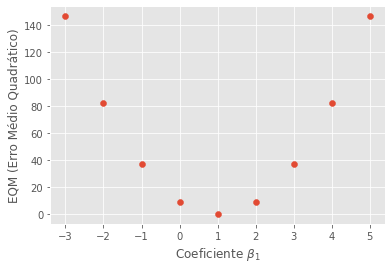

In [13]:
plt.scatter(coef_erro[:,0], coef_erro[:,1])
plt.xlabel('Coeficiente $\\beta_1$')
plt.ylabel('EQM (Erro Médio Quadrático)')

### Calculando os coeficientes $\beta_0$ e $\beta_1$ por meio das equações

$$
\beta_1 = \sum_{i=1}^N \frac{(x_i - \bar{x}) \cdot (y_i - \bar{y})}{(x_i - \bar{x})^2}
$$

$$
\beta_0 = \bar{y} - \beta_1\bar{x}
$$

In [14]:
x

array([0, 1, 2, 3, 4, 5])

In [15]:
y

array([0, 1, 2, 3, 4, 5])

In [16]:
x_mean = x.mean()
y_mean = y.mean()

In [17]:
x_mean, y_mean

(2.5, 2.5)

In [18]:
x - x_mean

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5])

In [19]:
y - y_mean

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5])

In [20]:
numerador = (x - x_mean) * (y - y_mean)
denominador = (x - x_mean)**2

In [21]:
b1 = sum(numerador) / sum(denominador)

b1

1.0

In [22]:
b0 = y_mean - b1 * x_mean

In [23]:
b0

0.0

## Regressão Linear Simples: Altura $\Rightarrow$ Peso

In [24]:
df = pd.read_csv('weight-height.csv')

In [25]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### Conversão das unidades

In [26]:
df['altura'] = df['Height'] * 2.54 # Conversão de polegadas para cm

In [27]:
df['peso'] = df['Weight'] * 0.453592 # Conversão de libras para kg

In [28]:
df.head()

,Gender,Height,Weight,altura,peso
0,Male,73.847017,241.893563,187.571423,109.720985
1,Male,68.781904,162.310473,174.706036,73.622732
2,Male,74.110105,212.740856,188.239668,96.497550
3,Male,71.730978,220.042470,182.196685,99.809504
4,Male,69.881796,206.349801,177.499761,93.598619


### Visualização gráfica

<AxesSubplot:xlabel='altura', ylabel='peso'>

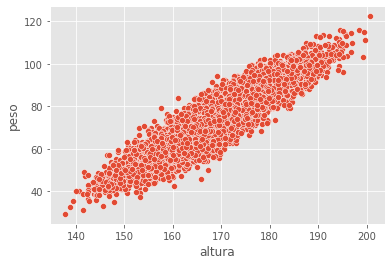

In [29]:
sns.scatterplot(data=df, x='altura', y='peso')

### Calculando a correlação entre as features

- Correlação muito forte: [-1, -0.8] or [0.8, 1]

$$
\beta_1 = \sum_{i=1}^N \frac{(x_i - \bar{x}) \cdot (y_i - \bar{y})}{(x_i - \bar{x})^2}
$$

$$
\beta_0 = \bar{y} - \beta_1\bar{x}
$$

In [30]:
from scipy.stats import pearsonr

In [31]:
pearsonr(df['altura'], df['peso'])

(0.9247562987409099, 0.0)

- Correlação muito forte: [-1, -0.8] or [0.8, 1]

$$
\beta_1 = \sum_{i=1}^N \frac{(x_i - \bar{x}) \cdot (y_i - \bar{y})}{(x_i - \bar{x})^2}
$$

$$
\beta_0 = \bar{y} - \beta_1\bar{x}
$$

In [32]:
X = df['altura'].values
y = df['peso'].values

In [33]:
y

array([109.72098511,  73.62273185,  96.49755015, ...,  58.2753768 ,
        74.32216565,  51.55032378])

In [34]:
x_mean = X.mean()
y_mean = y.mean()

In [35]:
x_mean, y_mean

(168.57360177724598, 73.22805433651739)

In [36]:
x - x_mean

array([-168.57360178, -167.57360178, -166.57360178, -165.57360178,
       -164.57360178, -163.57360178])

In [37]:
y - y_mean

array([ 36.49293077,   0.39467752,  23.26949582, ..., -14.95267754,
         1.09411131, -21.67773056])

In [38]:
numerador = (X - x_mean) * (y - y_mean)
denominador = (X - x_mean)**2

In [39]:
b1 = sum(numerador) / sum(denominador)

b1

1.3781495809287967

In [40]:
b0 = y_mean - b1 * x_mean

In [41]:
b0

-159.091584308452

In [42]:
y_est = b0 + b1 * X

In [43]:
y_est

array([ 99.409894  ,  81.67946637, 100.33083484, ...,  64.47831832,
        82.56277932,  57.7442444 ])

In [44]:
y

array([109.72098511,  73.62273185,  96.49755015, ...,  58.2753768 ,
        74.32216565,  51.55032378])

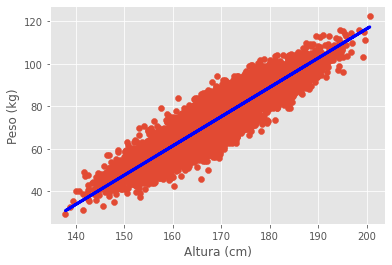

In [45]:
plt.scatter(X, y)
plt.plot(X, y_est, color='blue', linewidth=3)
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.show()

### Scikit Learn

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression() # Instanciando um objeto da classe LinearRegression

In [48]:
X

array([187.57142322, 174.70603628, 188.2396677 , ..., 162.22470022,
       175.34697755, 157.33838453])

In [49]:
# reformatando o array para que ele tenha n linhas (-1 significa que não importa a quantidade de linhas) e 1 coluna
X.reshape(-1, 1)

array([[187.57142322],
       [174.70603628],
       [188.2396677 ],
       ...,
       [162.22470022],
       [175.34697755],
       [157.33838453]])

In [50]:
# Fitar (treinar) o nosso modelo de Regressão Linear, passando X e y (altura e peso)

lr.fit(X.reshape(-1, 1), y)

LinearRegression()

In [51]:
lr.intercept_ # beta_0

-159.09158430845093

In [52]:
lr.coef_ # coeficientes dependentes da regressão linear

array([1.37814958])

In [53]:
b0, b1

(-159.091584308452, 1.3781495809287967)

In [54]:
lr.predict([[176]])

array([83.46274194])

In [55]:
lr.predict(X.reshape(-1, 1)) # valores estimados a partir da reta de regressão

array([ 99.409894  ,  81.67946637, 100.33083484, ...,  64.47831832,
        82.56277932,  57.7442444 ])

In [56]:
y # valor verdadeiro

array([109.72098511,  73.62273185,  96.49755015, ...,  58.2753768 ,
        74.32216565,  51.55032378])

In [57]:
lr.score(X.reshape(-1, 1), y) # r² (r-quadrado)

0.8551742120609958

### Statsmodels

In [58]:
import statsmodels.api as sm

In [59]:
x = sm.add_constant(X) # Sempre devemos utilizar, quando queremos que o modelo calcule/considere também o valor do intercepto

model = sm.OLS(y, x).fit() # Criando o modelo de regressão e fitando com base no y e x

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.904e+04
Date:                Mon, 23 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:14:49   Log-Likelihood:                -31313.
No. Observations:               10000   AIC:                         6.263e+04
Df Residuals:                    9998   BIC:                         6.265e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -159.0916      0.958   -166.109      0.000    -160.969    -157.214
x1             1.3781      0.006    242.975      0.000       1.367       1.389
==============================================================================
Omnibus:                        2.141   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                2.150
Skew:                           0.036   Prob(JB):                        0.341
Kurtosis:                       2.991   Cond. No.                     2.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Influência dos Outliers

### Obtendo apenas 100 amostras (como array)

In [61]:
X = df['altura'].values[:100]
y = df['peso'].values[:100]

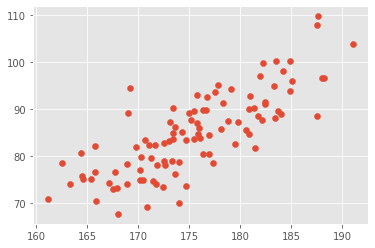

In [62]:
plt.scatter(X, y)

### Modelo sem a presença dos outliers

In [63]:
df.shape

(10000, 5)

In [64]:
lr = LinearRegression()

In [65]:
lr.fit(X.reshape(-1, 1), y)

LinearRegression()

In [66]:
lr.score(X.reshape(-1, 1), y)

0.6214261131940761

In [67]:
y_est = lr.predict(X.reshape(-1, 1))

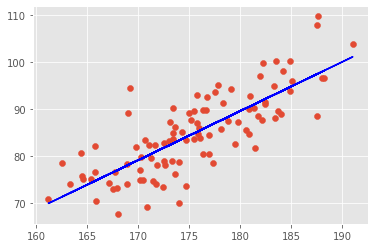

In [68]:
plt.scatter(X, y)
plt.plot(X, y_est, color='blue')

### Modelo com a presença dos outliers

In [69]:
X2 = np.append(X, [150, 140, 173])
y2 = np.append(y, [200, 100, 250])

In [70]:
lr2 = LinearRegression() # modelo com a presença dos outliers

In [71]:
lr2.fit(X2.reshape(-1, 1), y2)

LinearRegression()

In [72]:
y_est2 = lr2.predict(X2.reshape(-1, 1))

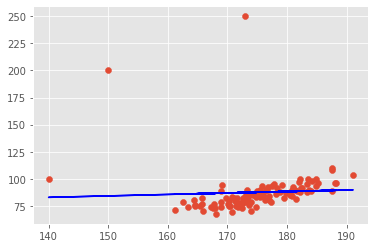

In [73]:
plt.scatter(X2, y2)
plt.plot(X2, y_est2, color='blue')

## Características dos Resíduos (Erros da regressão)

#### 1. Não devem ser correlacionados

#### Sem outliers

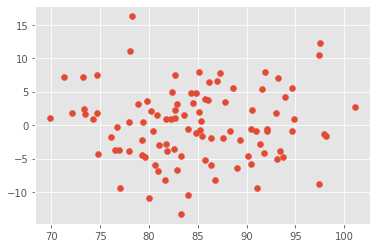

In [74]:
# No gráfico dos resíduos: eixo x deve ser o y_est e o eixo y devem ser os resíduos

plt.scatter(y_est, y - y_est)

#### Com outliers

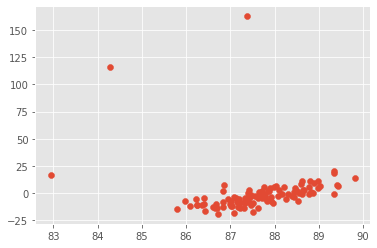

In [75]:
# No gráfico dos resíduos: eixo x deve ser o y_est e o eixo y devem ser os resíduos

plt.scatter(y_est2, y2 - y_est2)

### 2. Ter média zero

#### Sem outliers

In [76]:
erro = y - y_est

erro.mean()

3.467448550509289e-14

#### Com outliers

In [77]:
erro2 = y2 - y_est2

erro2.mean()

1.2969129545912509e-14

### 4. Distribuição normal dos resíduos

#### Sem outliers

<AxesSubplot:ylabel='Count'>

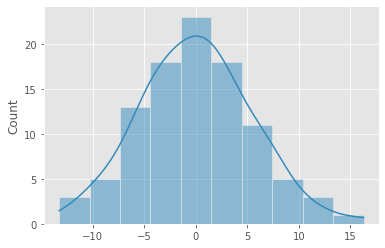

In [78]:
sns.histplot(x=erro, kde=True)

#### Com outliers

<AxesSubplot:ylabel='Count'>

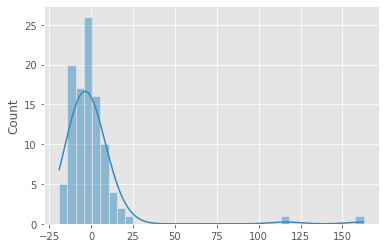

In [79]:
sns.histplot(x=erro2, kde=True)

## Métricas para Análise dos Erros

$$
SQE = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left[y_i - \hat{y}_i\right]^2 = \sum_{i=1}^N \left[y_i - (\beta_0 + \beta_1x_i)\right]^2
$$

$$
SQR = \sum_{i=1}^N \left(\hat{y}_i - \overline{y}\right)^2
$$

$$
SQT = \sum_{i=1}^N \left(y_i - \overline{y}\right)^2
$$

### 1. R-Quadrado ($R^2$)

$$
R^2 = 1 - \frac{SQE}{SQT} = \frac{SQT - SQE}{SQT} = \frac{SQR}{SQT}
$$

In [97]:
pearsonr(X, y)

(0.7883058500316209, 2.164207875204049e-22)

In [80]:
lr

LinearRegression()

In [82]:
lr.score(X.reshape(-1, 1), y) # R²

0.6214261131940761

In [83]:
from sklearn.metrics import r2_score

In [84]:
y_pred = lr.predict(X.reshape(-1, 1))

In [85]:
y_pred

array([ 97.48250832,  84.03878736,  98.18079219,  91.8661612 ,
        86.95809809,  79.98084264,  84.04722024,  82.88849624,
        79.35958931,  69.9041911 ,  90.44459275,  91.62682508,
        73.38072921,  85.36897221,  85.26456244,  81.02288431,
        93.69048048,  71.27860969,  86.31648737,  81.79361875,
        81.73800131,  85.78400572,  77.05093666, 101.08942358,
        81.67999725,  82.34576233,  84.85555119,  94.70577566,
        80.42734628,  83.28104903,  83.60404996,  97.97828418,
        91.3279934 ,  85.09583322,  86.14965217,  88.33597053,
        84.81982524,  79.8229391 ,  76.1436947 ,  72.15412323,
        81.89535711,  93.08296348,  74.71847938,  76.89446059,
        80.66377859,  87.54995471,  82.63189259,  93.03859397,
        85.09502773,  94.8902853 ,  73.42386984,  87.75900756,
        83.26787075,  80.18737816,  79.28525746,  77.98100891,
        82.90054922,  89.32738683,  90.49911328,  87.30730718,
        90.99613116,  86.08277408,  97.40691075,  79.30

In [86]:
y

array([109.72098511,  73.62273185,  96.49755015,  99.80950419,
        93.59861876,  69.04221615,  83.42821885,  76.19035195,
        79.80018673,  70.94164201,  84.64250139,  96.95128455,
        75.80767932,  85.93127231,  84.56504714,  78.10261398,
        88.91696224,  78.41855902,  84.36083528,  82.74726813,
        78.9775925 ,  89.68939099,  67.66393615, 103.76451359,
        73.48492123,  87.24568902,  83.65831963,  93.8156121 ,
        79.47563349,  70.00858628,  85.051604  ,  96.57437493,
        88.46506527,  93.06964917,  92.60721401,  87.49949121,
        89.57908694,  83.37518697,  74.32187695,  73.98449171,
        78.0793299 ,  88.0174433 ,  76.48366074,  73.11605148,
        74.68858448,  85.69364533,  84.84916998,  94.83287107,
        87.09616643,  95.86326582,  75.12010874,  91.20461347,
        78.66372102,  82.28507206,  76.99166618,  74.07589557,
        86.05103355,  87.14629376,  89.90123773,  95.03954411,
        90.15585187,  89.84728729,  88.58225936,  74.81

In [87]:
r2_score(y, y_pred)

0.6214261131940761

### 2. MAE

In [88]:
from sklearn.metrics import mean_absolute_error

In [89]:
mean_absolute_error(y, y_pred)

4.260493303495109

### 3. MSE

In [91]:
from sklearn.metrics import mean_squared_error

In [92]:
mean_squared_error(y, y_pred)

28.728718184843036

### 4. RMSE

In [93]:
np.sqrt(mean_squared_error(y, y_pred))

5.359917740492202

### 5. RMSLE

In [94]:
from sklearn.metrics import mean_squared_log_error

In [95]:
np.sqrt(mean_squared_log_error(y, y_pred))

0.06297159962233728

### No Sklearn...